### 1. Preparação do Ambiente

In [ ]:
import os
import zipfile
import shutil

# 1. Baixar o ZIP do GitHub
ZIP_URL = "https://github.com/andrerizzo/CNN_para_Controle_de_Qualidade/archive/refs/heads/master.zip"
ZIPFILE = "/content/CNN.zip"

print("Baixando o dataset...")
!wget "$ZIP_URL" -O "$ZIPFILE"

# 2. Extrair o conteúdo
extract_path = "/content"

print("Extraindo arquivos...")
with zipfile.ZipFile(ZIPFILE, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 3. Mover os arquivos da subpasta para /content
extracted_folder = os.path.join(extract_path, "CNN_para_Controle_de_Qualidade-master")

print("Movendo arquivos para a raiz do Colab...")
for item in os.listdir(extracted_folder):
    shutil.move(os.path.join(extracted_folder, item), extract_path)

# 4. Limpar: remover pasta intermediária e ZIP
print("Limpando arquivos temporários...")
shutil.rmtree(extracted_folder)
os.remove(ZIPFILE)

print("Processo finalizado com sucesso!")


Baixando o dataset...
--2025-04-01 20:11:00--  https://github.com/andrerizzo/CNN_para_Controle_de_Qualidade/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/andrerizzo/CNN_para_Controle_de_Qualidade/zip/refs/heads/master [following]
--2025-04-01 20:11:00--  https://codeload.github.com/andrerizzo/CNN_para_Controle_de_Qualidade/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/content/CNN.zip’

/content/CNN.zip        [              <=>   ]  93.79M  33.4MB/s    in 2.8s    

2025-04-01 20:11:07 (33.4 MB/s) - ‘/content/CNN.zip’ saved [98347254]

Extraindo arquivos...
Movendo arquivo

### 2. Importar bibliotecas necessárias

In [ ]:
from src.data_acquisition import download_and_extract_github_dataset, organize_images
from src.preprocess import train_val_test_generators, vgg16_pre_processing
from src.build_model import build_model, compile_model
from src.train_model import train_model
from src.evaluate_model import plot_training_history, performance_metrics


### 3. Download e Preparação das Imagens

In [ ]:
# Download from GitHub
URL = 'https://raw.githubusercontent.com/andrerizzo/CNN_para_Controle_de_Qualidade/master/data/raw/archive.zip'
DOWNLOAD_PATH = '/content'
EXTRACT_PATH = '/content/data/images'
download_and_extract_github_dataset(github_url=URL,
                                    download_path=DOWNLOAD_PATH,
                                    extract_path=EXTRACT_PATH
                                    )


# Organizar imagens
organize_images(extract_path=EXTRACT_PATH)


### 4. Criação dos datasets de treino, validação e teste

In [ ]:
IMAGE_PATH='/content/data/images'
IMAGE_SIZE=(224,224)
BATCH_SIZE=32
VALIDATION_SPLIT=0.1
TEST_SPLIT=0.2


# Cria datasets de treino, validação e teste
train_img, val_img, test_img, nome_classes = train_val_test_generators(img_path=IMAGE_PATH,
                                                         img_size=IMAGE_SIZE,
                                                         bt_size=BATCH_SIZE,
                                                         val_split=VALIDATION_SPLIT,
                                                         test_split=TEST_SPLIT
                                                         )


# Aplica pre-processamento específico do modelo VGG16
train_img, val_img, test_img = vgg16_pre_processing(train_ds=train_img,
                                                    val_ds=val_img,
                                                    test_ds=test_img)

print("Imagens de treino:", len(train_img))
print("Imagens de validação:", len(val_img))
print("Imagens de teste:", len(test_img))
print(f'Classes: :{nome_classes}')

Found 7224 files belonging to 4 classes.
Imagens de treino: 163
Imagens de validação: 18
Imagens de teste: 45
Classes: :['Danificados', 'Maduros', 'Velhos', 'Verdes']


### 5. Criação e Compilação do Modelo

In [ ]:
model_vgg16 = build_model(input_shape=(224,224,3), num_classes=4)
model_vgg16 = compile_model(model=model_vgg16, learning_rate=0.0001)
model_vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,138,500 (80.64 MB)

 Trainable params: 6,423,812 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

### 6. Treinamento do Modelo

In [ ]:
history = train_model(model=model_vgg16,
                      train_images=train_img,
                      val_images=val_img,
                      output_dir='content/models',
                      model_file_name='model_vgg16.keras',
                      epochs=20,
                      patience=5)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6621 - loss: 0.9308
Epoch 1: val_accuracy improved from -inf to 0.91319, saving model to content/models/model_vgg16.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - accuracy: 0.6629 - loss: 0.9284 - val_accuracy: 0.9132 - val_loss: 0.2120 - learning_rate: 1.0000e-04
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9094 - loss: 0.1743
Epoch 2: val_accuracy improved from 0.91319 to 0.94965, saving model to content/models/model_vgg16.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9094 - loss: 0.1743 - val_accuracy: 0.9497 - val_loss: 0.0883 - learning_rate: 1.0000e-04
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9151 - loss: 0.1115
Epoch 3: val_accuracy did not improve from 0.94965
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9152 - loss: 0.1114 - val_accuracy: 0.9479 - val_loss: 0.0598 - learning_rate: 1.0000e-04
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s

### 7. Avaliação do Modelo

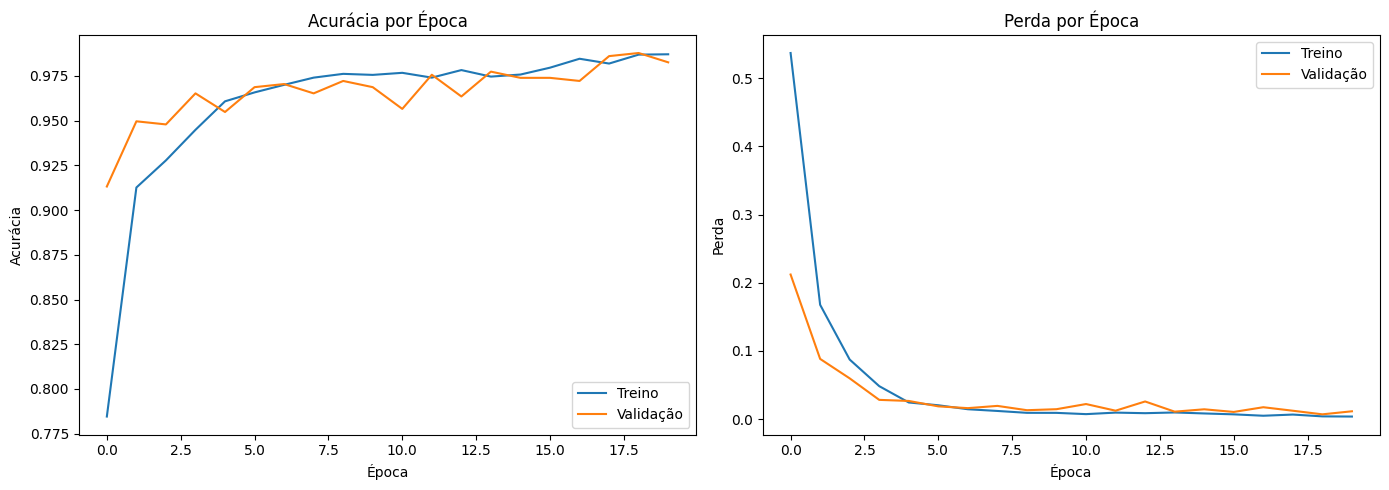


Relatório de Classificação:
              precision    recall  f1-score   support

 Danificados       0.97      0.92      0.94       218
     Maduros       0.98      1.00      0.99       446
      Velhos       0.97      0.98      0.97       430
      Verdes       0.99      0.98      0.98       346

    accuracy                           0.98      1440
   macro avg       0.98      0.97      0.97      1440
weighted avg       0.98      0.98      0.98      1440



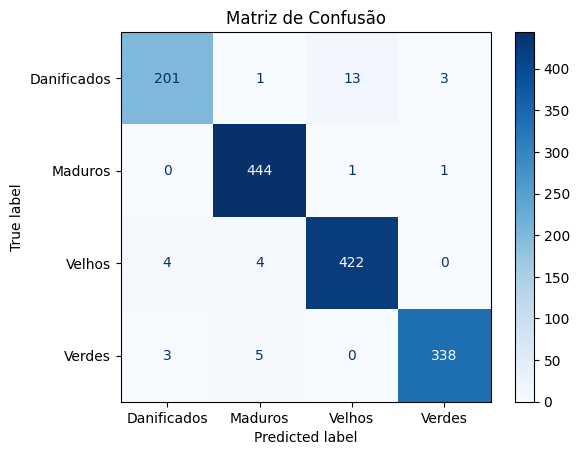

In [ ]:
plot_training_history(history=history)
performance_metrics(model=model_vgg16,
                    test_dataset=test_img,
                    class_names=nome_classes
                    )